In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import seaborn as sns
from scipy.stats import zscore


In [2]:
ai_df = pd.read_csv("ai_model_predictions.csv")
attorney_df = pd.read_csv("g_attorney_disambiguated.tsv", sep="\t")
location_df = pd.read_csv("g_location_disambiguated.tsv", sep="\t")
application_df = pd.read_csv("g_application.tsv", sep="\t")
inventor_df = pd.read_csv("g_inventor_disambiguated.tsv", sep="\t")

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_1322/2776524783.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ai_df = pd.read_csv("ai_model_predictions.csv")
/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_1322/2776524783.py:4: DtypeWarning: Columns (0,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  application_df = pd.read_csv("g_application.tsv", sep="\t")


In [3]:
ai_df["pub_dt"] = pd.to_datetime(ai_df["pub_dt"])
ai_df["year"] = ai_df["pub_dt"].dt.year

In [4]:
merged_df = pd.merge(ai_df, application_df, left_on='appl_id', right_on='application_id', how='left')
merged_df[-5:]
merged_df.drop(columns=['appl_id'], inplace=True)
merged_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,predict86_hardware,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0,0,0.001062,2018,14643719,10000000,14,2015-03-10,14,0.0
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0,0,0.000073,2018,14962323,10000001,14,2015-12-08,14,0.0
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0,0,0.000369,2018,15107519,10000002,15,2014-12-30,15,0.0
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,0,0,0.000518,2018,14437961,10000003,14,2013-03-12,14,0.0
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,0,0,0.000068,2018,14973198,10000004,14,2015-12-17,14,0.0


In [5]:
#merge for getting location_id in this merged dataset using the inventor dataset
new_df = pd.merge(merged_df, attorney_df, on='patent_id', how='left')
new_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,patent_application_type,filing_date,series_code,rule_47_flag,attorney_sequence,attorney_id,disambig_attorney_name_first,disambig_attorney_name_last,disambig_attorney_organization,attorney_country
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,14,2015-03-10,14,0.0,0.0,b3c98f20e3e28fd54083915ad978353c,NaN,NaN,"Munck Wilson Mandala, LLP",NaN
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,14,2015-12-08,14,0.0,0.0,e6f577eb0680dac0003c00a6ed8806c0,NaN,NaN,K&L Gates LLP,NaN
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,15,2014-12-30,15,0.0,0.0,1841e0cfc9cd02b68b0ec6269adda229,NaN,NaN,"Lex IP Meister, PLLC",NaN
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,14,2013-03-12,14,0.0,0.0,380f74ad81a6fdf6e937ad2352257058,NaN,NaN,"Grossman, Tucker, Perreault & Pfleger, PLLC",NaN
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,14,2015-12-17,14,0.0,0.0,0c34dbbb2964ace1b1b5ebad6bd09a54,NaN,NaN,"Defillo & Associates, Inc.",NaN


In [6]:
new_df.columns

Index(['doc_id', 'flag_patent', 'pub_dt', 'predict50_any_ai',
       'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml',
       'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo',
       'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp',
       'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech',
       'predict93_speech', 'ai_score_speech', 'predict50_vision',
       'predict86_vision', 'predict93_vision', 'ai_score_vision',
       'predict50_planning', 'predict86_planning', 'predict93_planning',
       'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr',
       'ai_score_kr', 'predict50_hardware', 'predict86_hardware',
       'predict93_hardware', 'ai_score_hardware', 'year', 'application_id',
       'patent_id', 'patent_application_type', 'filing_date', 'series_code',
       'rule_47_flag', 'attorney_sequence', 'attorney_id',
       'disambig_attorney_name_first', 'disambig_attorney_name_last',
    

In [7]:
df = new_df

In [8]:
check = df[df['year'] == 2018]
check


,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,patent_application_type,filing_date,series_code,rule_47_flag,attorney_sequence,attorney_id,disambig_attorney_name_first,disambig_attorney_name_last,disambig_attorney_organization,attorney_country
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,14,2015-03-10,14,0.0,0.0,b3c98f20e3e28fd54083915ad978353c,NaN,NaN,"Munck Wilson Mandala, LLP",NaN
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,14,2015-12-08,14,0.0,0.0,e6f577eb0680dac0003c00a6ed8806c0,NaN,NaN,K&L Gates LLP,NaN
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,15,2014-12-30,15,0.0,0.0,1841e0cfc9cd02b68b0ec6269adda229,NaN,NaN,"Lex IP Meister, PLLC",NaN
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,14,2013-03-12,14,0.0,0.0,380f74ad81a6fdf6e937ad2352257058,NaN,NaN,"Grossman, Tucker, Perreault & Pfleger, PLLC",NaN
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,14,2015-12-17,14,0.0,0.0,0c34dbbb2964ace1b1b5ebad6bd09a54,NaN,NaN,"Defillo & Associates, Inc.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780820,RE47180,1,2018-12-25,0,0,0,0,0,0,0.000134,...,15,2016-11-02,15,0.0,1.0,4b2be3bd4001a8fb69c5aa79c904cb52,Michael A.,Glenn,NaN,NaN
17780821,RE47180,1,2018-12-25,0,0,0,0,0,0,0.000134,...,15,2016-11-02,15,0.0,0.0,5b244d5a5242cbce914c9917814efdb9,NaN,NaN,Perkins Coie LLP,NaN
17780822,RE47181,1,2018-12-25,0,0,0,0,0,0,0.000399,...,15,2016-02-04,15,0.0,0.0,8cdfc20c7a4ef6e2bc1cd3a3cd816022,NaN,NaN,"Birch, Stewart, Kolasch & Birch, LLP",NaN
17780823,RE47182,1,2018-12-25,0,0,0,0,0,0,0.000291,...,14,2015-12-30,14,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
check['disambig_attorney_organization'].notna().sum()


515039

In [10]:
df['has_attorney'] = ~df['disambig_attorney_organization'].isna()



In [11]:
df_attorney = df[df['has_attorney']]
#df_attorney[df_attorney['year'] == 2000]
#thos proves that the rows were just not sorted but the table has values for all

In [12]:
df_no_attorney = df[~df['has_attorney']]


In [13]:
top_attorneys = (
    df_attorney['disambig_attorney_organization']
    .value_counts()
    .head(5)
    .reset_index()
)
top_attorneys.columns = ['attorney_organization', 'patent_count']

In [14]:
top_5_names = top_attorneys['attorney_organization']
print("Top 5 Most Popular Attorneys by Patent Count:\n")
for idx, row in top_attorneys.iterrows():
    print(f"{idx+1}. {row['attorney_organization']} — {row['patent_count']} patents")

Top 5 Most Popular Attorneys by Patent Count:

1. Sughrue Mion, PLLC — 157541 patents
2. Birch, Stewart, Kolasch & Birch, LLP — 119657 patents
3. Fish & Richardson P.C. — 117477 patents
4. Oblon, McClelland, Maier & Neustadt, L.L.P. — 92151 patents
5. Harness, Dickey & Pierce, P.L.C. — 87949 patents


In [15]:
top_5_attorney_patents = df_attorney[
    df_attorney['disambig_attorney_organization'].isin(top_5_names)
]

In [16]:
merged_investor_df = pd.merge(top_5_attorney_patents, inventor_df, on = 'patent_id', how='left')

In [17]:
merged_loc_df = pd.merge(merged_investor_df, location_df , on='location_id', how='left')


In [18]:
attorney_state_counts = (
    merged_loc_df.groupby(['disambig_attorney_organization', 'disambig_state'])
    .size()
    .reset_index(name='patent_count')
)

In [19]:
attorney_state_counts

,disambig_attorney_organization,disambig_state,patent_count
0,"Birch, Stewart, Kolasch & Birch, LLP",AB,55
1,"Birch, Stewart, Kolasch & Birch, LLP",AL,21
2,"Birch, Stewart, Kolasch & Birch, LLP",AR,8
3,"Birch, Stewart, Kolasch & Birch, LLP",AZ,53
4,"Birch, Stewart, Kolasch & Birch, LLP",BC,66
...,...,...,...
287,"Sughrue Mion, PLLC",VT,146
288,"Sughrue Mion, PLLC",WA,418
289,"Sughrue Mion, PLLC",WI,66
290,"Sughrue Mion, PLLC",WV,26


In [20]:
attorney_state_counts = (
    merged_loc_df
    .groupby(['disambig_attorney_organization', 'disambig_state'])
    .size()
    .reset_index(name='patent_count')
)

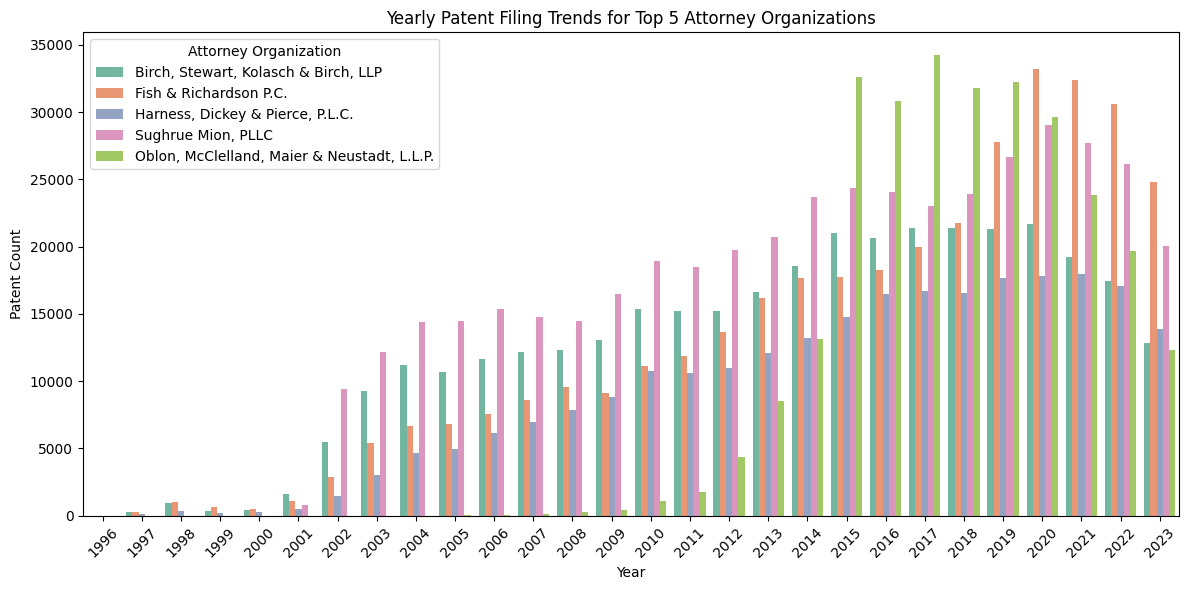

In [21]:
yearly_counts = (
    merged_loc_df
    .groupby(['year', 'disambig_attorney_organization'])
    .size()
    .reset_index(name='patent_count')
)

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_counts,
            x='year',
            y='patent_count',
            hue='disambig_attorney_organization',
            palette='Set2')

plt.title('Yearly Patent Filing Trends for Top 5 Attorney Organizations')
plt.xlabel('Year')
plt.ylabel('Patent Count')
plt.legend(title='Attorney Organization')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
state_patent_stats = (
    merged_loc_df.groupby('disambig_state')
    .agg(total_patents=('patent_id', 'count'),
         unique_attorneys=('disambig_attorney_organization', 'nunique'))
    .reset_index()
    .sort_values('total_patents', ascending=False)
)

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_1322/4052101328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_patent_stats.head(15), x='disambig_state', y='total_patents', palette='Blues_d')


TypeError: text() missing 1 required positional argument: 's'

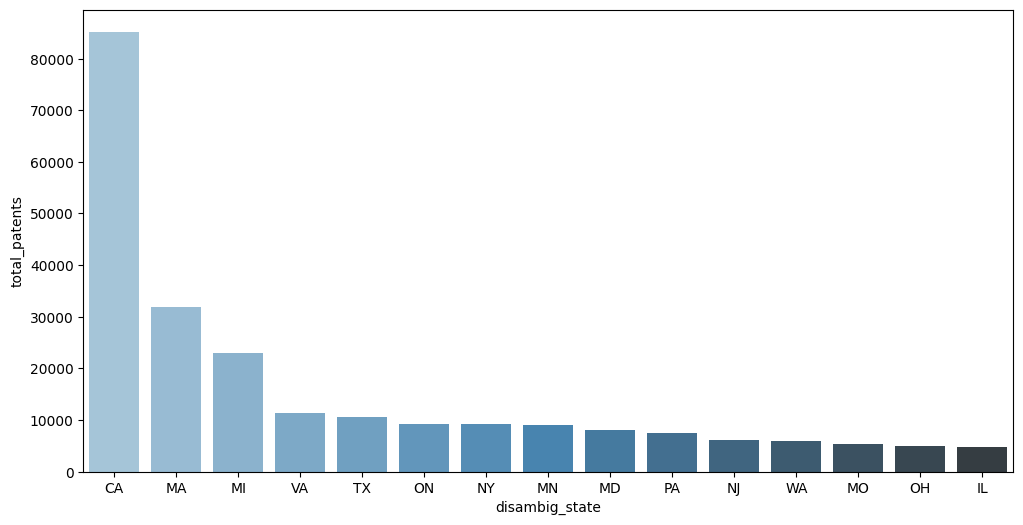

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=state_patent_stats.head(15), x='disambig_state', y='total_patents', palette='Blues_d')

# Annotate with number of attorneys used
for i, row in state_patent_stats.head(15).iterrows():
    plt.text(i, row['total_patents'] + 100,
             ha='center', fontsize=9)

plt.title('Total Patents per State (with Attorney Involvement)')
plt.xlabel('State')
plt.ylabel('Patent Count')
plt.tight_layout()
plt.show()

In [24]:
total_patents = pd.read_csv('total_patents.csv')

In [25]:
total_patents.head() #AS is American Samoa which is a minor island state

,disambig_state,patent_count
0,AK,1930
1,AL,25834
2,AR,13143
3,AS,1
4,AZ,132693


In [26]:
attorney_state_counts = (
    merged_loc_df
    .groupby(['disambig_state'])
    .size()
    .reset_index(name='patent_count_with_atotrney')
)
attorney_state_counts.head()

,disambig_state,patent_count_with_atotrney
0,AB,1352
1,AK,11
2,AL,936
3,AR,108
4,AZ,2831


In [27]:
merged_df = pd.merge(
    total_patents.rename(columns={'patent_count': 'total_patents'}),
    attorney_state_counts.rename(columns={'patent_count': 'patent_count_with_atotrney'}),
    on='disambig_state',
    how='inner'
)

print(merged_df)

   disambig_state  total_patents  patent_count_with_atotrney
0              AK           1930                          11
1              AL          25834                         936
2              AR          13143                         108
3              AZ         132693                        2831
4              CA        2101519                       85242
5              CO         148240                        3446
6              CT         151272                        2977
7              DC           9068                         828
8              DE          27695                        2217
9              FL         183803                        4530
10             GA         118464                        2231
11             HI           5150                          53
12             IA          52159                         494
13             ID          57246                         324
14             IL         293116                        4790
15             IN       

In [28]:
merged_df['attorney_involvement_percent'] = (
    merged_df['patent_count_with_atotrney'] / merged_df['total_patents'] * 100
).round(2)  # Round to 2 decimal places for readability

print(merged_df[['disambig_state', 'attorney_involvement_percent']]
      .sort_values('attorney_involvement_percent', ascending=False))

   disambig_state  attorney_involvement_percent
46             VA                          9.84
7              DC                          9.13
8              DE                          8.01
19             MA                          7.86
24             MO                          7.81
30             NH                          7.63
20             MD                          7.31
22             MI                          7.11
29             NE                          6.91
40             RI                          4.46
4              CA                          4.06
47             VI                          3.85
28             ND                          3.78
23             MN                          3.69
1              AL                          3.62
25             MS                          3.23
43             TN                          3.22
38             PA                          2.85
51             WV                          2.62
21             ME                       

In [29]:
fig = px.choropleth(
    merged_df,
    locations='disambig_state',
    locationmode='USA-states',
    color='attorney_involvement_percent',
    scope='usa',
    color_continuous_scale='Plasma',
    labels={'attorney_involvement_percent': 'Attorney %'},
    title='Attorney Involvement Rate by State'
)
fig.show()

In [30]:
merged_df['attorney_involvement_percent'] = (
    merged_df['patent_count_with_atotrney'] / merged_df['total_patents'] * 100
)

In [31]:
top_states = merged_df.sort_values('attorney_involvement_percent', ascending=False).head(10)


/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_1322/1965161003.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




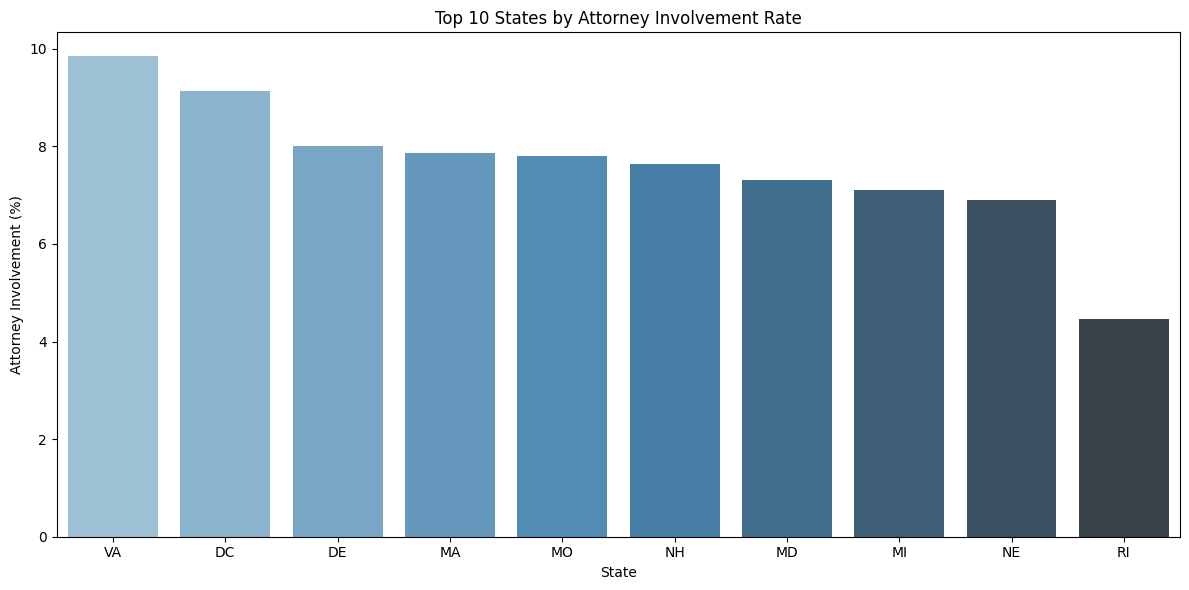

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_states, x='disambig_state', y='attorney_involvement_percent', palette='Blues_d')
plt.title('Top 10 States by Attorney Involvement Rate')
plt.xlabel('State')
plt.ylabel('Attorney Involvement (%)')


plt.tight_layout()
plt.show()

In [33]:
df_no_attorney.columns

Index(['doc_id', 'flag_patent', 'pub_dt', 'predict50_any_ai',
       'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml',
       'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo',
       'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp',
       'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech',
       'predict93_speech', 'ai_score_speech', 'predict50_vision',
       'predict86_vision', 'predict93_vision', 'ai_score_vision',
       'predict50_planning', 'predict86_planning', 'predict93_planning',
       'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr',
       'ai_score_kr', 'predict50_hardware', 'predict86_hardware',
       'predict93_hardware', 'ai_score_hardware', 'year', 'application_id',
       'patent_id', 'patent_application_type', 'filing_date', 'series_code',
       'rule_47_flag', 'attorney_sequence', 'attorney_id',
       'disambig_attorney_name_first', 'disambig_attorney_name_last',
    

In [34]:
df_no_attorney.head()

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,filing_date,series_code,rule_47_flag,attorney_sequence,attorney_id,disambig_attorney_name_first,disambig_attorney_name_last,disambig_attorney_organization,attorney_country,has_attorney
5,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,2015-12-17,14,0.0,1.0,b44752ad3f26c6c7dc7932002cd1563b,Evelyn A.,Defillo,NaN,NaN,False
10,10000009,1,2018-06-19,0,0,0,0,0,0,0.000153,...,2015-02-05,14,0.0,0.0,d21e642f9bb7c290f6027bc948364c34,Thomas,Schneck,NaN,US,False
27,10000028,1,2018-06-19,0,0,0,0,0,0,0.000283,...,2013-08-13,14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
30,10000031,1,2018-06-19,0,0,0,0,0,0,0.000253,...,2014-09-09,14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
31,10000032,1,2018-06-19,0,0,0,0,0,0,0.000039,...,2012-04-10,14,0.0,0.0,974bb4f8fe098c942e89822d07878072,Norman B.,Thot,NaN,NaN,False


In [35]:
merged_investor_df = pd.merge(df_no_attorney, inventor_df, on = 'patent_id', how='left')

In [36]:
merged_loc_df = pd.merge(merged_investor_df, location_df , on='location_id', how='left')
merged_loc_df.head()


,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,gender_code,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,M,74ce52e1-16c8-11ed-9b5f-1234bde3cd05,Monterrey,NaN,MX,25.680202,-100.315258,NaN,NaN,NaN
1,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,M,74ce52e1-16c8-11ed-9b5f-1234bde3cd05,Monterrey,NaN,MX,25.680202,-100.315258,NaN,NaN,NaN
2,10000009,1,2018-06-19,0,0,0,0,0,0,0.000153,...,M,c6999d14-16c7-11ed-9b5f-1234bde3cd05,Hayward,CA,US,37.668821,-122.080796,Alameda,6.0,1.0
3,10000028,1,2018-06-19,0,0,0,0,0,0,0.000283,...,M,d7e118b7-16c7-11ed-9b5f-1234bde3cd05,Inver Grove Heights,MN,US,44.847904,-93.042812,Dakota,27.0,37.0
4,10000028,1,2018-06-19,0,0,0,0,0,0,0.000283,...,M,cb5e57a6-16c7-11ed-9b5f-1234bde3cd05,Windom,MN,US,43.866346,-95.116937,Cottonwood,27.0,33.0


In [37]:
df = merged_loc_df[merged_loc_df['disambig_state'].notna()]


In [38]:
df.head()

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,gender_code,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
2,10000009,1,2018-06-19,0,0,0,0,0,0,0.000153,...,M,c6999d14-16c7-11ed-9b5f-1234bde3cd05,Hayward,CA,US,37.668821,-122.080796,Alameda,6.0,1.0
3,10000028,1,2018-06-19,0,0,0,0,0,0,0.000283,...,M,d7e118b7-16c7-11ed-9b5f-1234bde3cd05,Inver Grove Heights,MN,US,44.847904,-93.042812,Dakota,27.0,37.0
4,10000028,1,2018-06-19,0,0,0,0,0,0,0.000283,...,M,cb5e57a6-16c7-11ed-9b5f-1234bde3cd05,Windom,MN,US,43.866346,-95.116937,Cottonwood,27.0,33.0
5,10000028,1,2018-06-19,0,0,0,0,0,0,0.000283,...,M,cc7235d2-16c7-11ed-9b5f-1234bde3cd05,Mendota Heights,MN,US,44.883577,-93.138275,Dakota,27.0,37.0
6,10000028,1,2018-06-19,0,0,0,0,0,0,0.000283,...,M,d1bea169-16c7-11ed-9b5f-1234bde3cd05,Hudson,WI,US,44.975127,-92.755628,St. Croix,55.0,109.0


In [39]:
no_attorney_state_counts = (
    df
    .groupby(['disambig_state'])
    .size()
    .reset_index(name='patent_count_without_atotrney')
)
no_attorney_state_counts.head()

,disambig_state,patent_count_without_atotrney
0,AB,26922
1,AK,1974
2,AL,27369
3,AR,11939
4,AS,1


In [40]:
fig = px.choropleth(
    no_attorney_state_counts,
    locations='disambig_state',
    locationmode='USA-states',
    color='patent_count_without_atotrney',
    scope='usa',
    color_continuous_scale='Reds',
    title='Patent Filings Without Attorney Involvement by State'
)

fig.show()

In [41]:
non_attorney_yearly = df.groupby('year').size().reset_index(name='no_attorney_count')
total_yearly = new_df.groupby('year').size().reset_index(name='total_count')

merged = pd.merge(non_attorney_yearly, total_yearly, on='year')
merged['no_attorney_percent'] = (merged['no_attorney_count'] / merged['total_count']) * 100
merged['percent_change'] = merged['no_attorney_percent'].pct_change() * 100


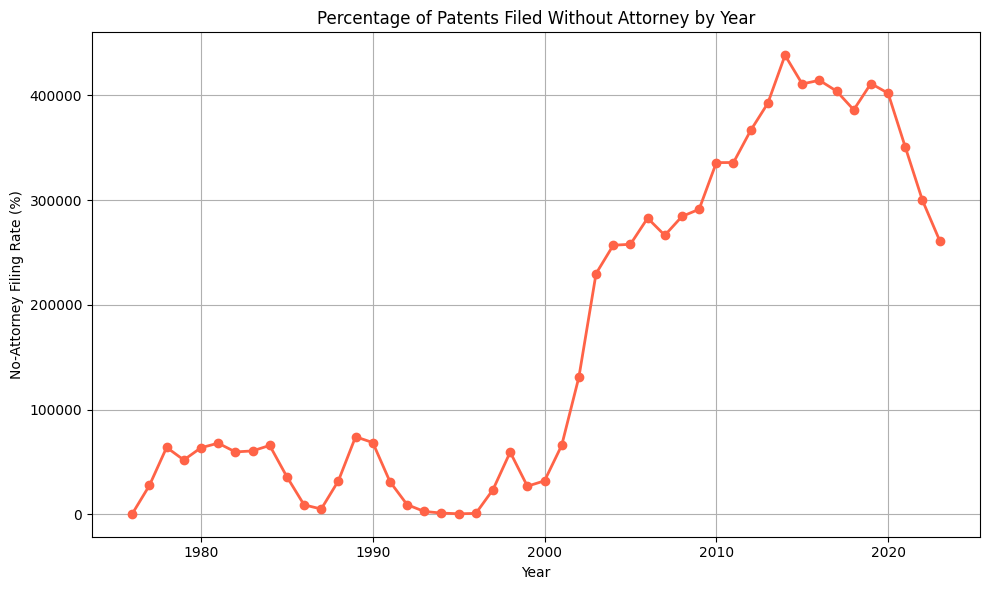

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(merged['year'], merged['no_attorney_count'], marker='o', linewidth=2, color='tomato')
plt.title('Percentage of Patents Filed Without Attorney by Year')
plt.xlabel('Year')
plt.ylabel('No-Attorney Filing Rate (%)')
plt.grid(True)


plt.tight_layout()
plt.show()

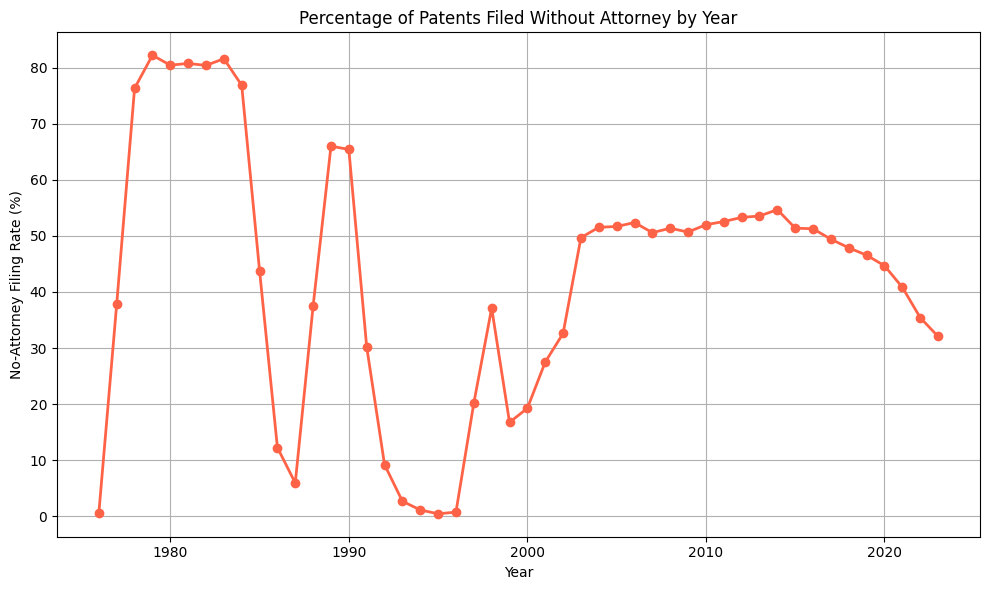

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(merged['year'], merged['no_attorney_percent'], marker='o', linewidth=2, color='tomato')
plt.title('Percentage of Patents Filed Without Attorney by Year')
plt.xlabel('Year')
plt.ylabel('No-Attorney Filing Rate (%)')
plt.grid(True)


plt.tight_layout()
plt.show()

In [43]:
state_total = df.groupby('disambig_state').size().reset_index(name='total_patents')
state_no_attorney = df.groupby('disambig_state').size().reset_index(name='no_attorney_patents')

merged_state = pd.merge(state_total, state_no_attorney, on='disambig_state')
merged_state['no_attorney_rate'] = (merged_state['no_attorney_patents'] / merged_state['total_patents']) * 100


In [44]:
state_year_counts = df.groupby(['disambig_state', 'year']).size().reset_index(name='count')


In [45]:
pivot_df = state_year_counts.pivot(index='disambig_state', columns='year', values='count').fillna(0)
pivot_df.head()

year,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
disambig_state,,,,,,,,,,,,,,,,,,,,,
AB,0.0,43.0,172.0,108.0,93.0,92.0,126.0,91.0,118.0,61.0,...,1225.0,1410.0,1542.0,1670.0,1700.0,1804.0,1882.0,1552.0,1380.0,1079.0
AK,0.0,12.0,9.0,11.0,14.0,14.0,15.0,19.0,10.0,11.0,...,71.0,59.0,121.0,153.0,91.0,121.0,94.0,73.0,91.0,49.0
AL,4.0,186.0,416.0,381.0,384.0,415.0,316.0,362.0,408.0,247.0,...,1383.0,1042.0,1314.0,1279.0,1125.0,1296.0,1360.0,1303.0,896.0,924.0
AR,0.0,35.0,64.0,63.0,71.0,57.0,61.0,60.0,56.0,20.0,...,513.0,513.0,535.0,707.0,864.0,1123.0,843.0,772.0,602.0,535.0
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
if 2010 in pivot_df.columns and 2023 in pivot_df.columns:
    pivot_df['percent_change_2010_2023'] = (
        (pivot_df[2023] - pivot_df[2010]) / pivot_df[2010].replace(0, 1) * 100
    )
else:
    print("Ensure your dataset includes both 2010 and 2023.")

In [47]:
top_states = pivot_df.sort_values('percent_change_2010_2023', ascending=False).head(10).reset_index()


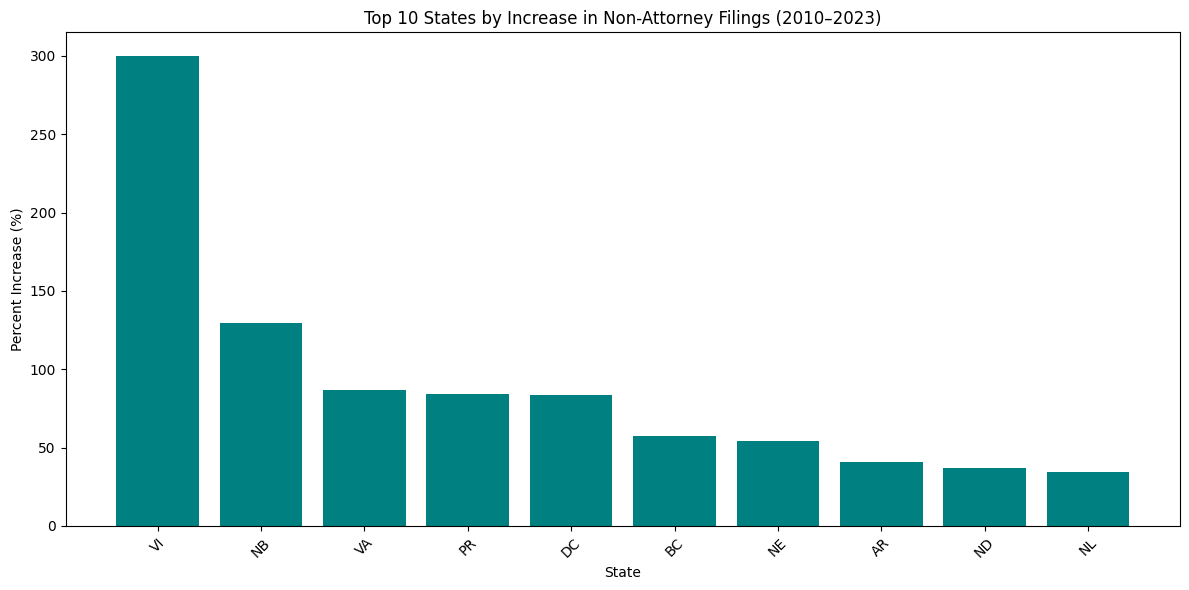

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(top_states['disambig_state'], top_states['percent_change_2010_2023'], color='teal')
plt.title('Top 10 States by Increase in Non-Attorney Filings (2010–2023)')
plt.xlabel('State')
plt.ylabel('Percent Increase (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()